# Fitness Age Clock Construction for VQ of L-NewCo

The purpose of this notebook is to demonstrate how biological age can be calculated from physical fitness test scores.

## Code Library Imports

In [1]:
import numpy as np
import pandas as pd
from datetime import date

## DEXA Calculation

In [20]:
vo2max_hawkins2003 = pd.read_csv('VO2max_hawkins2003.csv')
vo2max_hawkins2003.head()

,Column 1,Column 2,Column 3,Column 4,Column 5,Column 6
0,Men,NaN,NaN,Women,NaN,NaN
1,Age,vo2lm,vo2kgm,Age,vo2lm,vo2kgm
2,44,3.42,52.45,43,3.09,57.37
3,42,3.98,58.32,46,2.42,45.49
4,51,4.41,60.9,40,2.32,36.3


## FEV1 Calculation

### NHANES III FEV Reference Values Calculator
Code: https://github.com/kennethverstraete/spiref

In [6]:
from spiref import nhanes3 # https://github.com/kennethverstraete/spiref

# Load the calculator
rvc = nhanes3.NHANESReferenceValueCalculator()

# Use the calculator to compute FEV1 for a male of height 174cm, age 28 of the African-American race.
fev1s = np.array([])
ages = np.array(range(50,80))

for age in range(50,80):
    fev1s = np.append(fev1s, 
                          rvc.calculate_fev1('male', 174, age, race='AfrAm'))
ages_fev1_df = pd.DataFrame(fev1s,ages)

In [37]:
fev1s_AfrAm,fev1s_Cau,fev1s_other = np.array([]),np.array([]),np.array([])
ages = np.array(range(50,81))
for age in ages:
    fev1s_AfrAm = np.append(fev1s_AfrAm, 
                          rvc.calculate_fev1('male', 174, age, race='AfrAm'))
    fev1s_Cau = np.append(fev1s_Cau, 
                          rvc.calculate_fev1('male', 174, age, race='Cau'))
    fev1s_other = np.append(fev1s_other, 
                          rvc.calculate_fev1('male', 174, age, race='other'))
    
ages_fev1_df = pd.DataFrame(fev1s_AfrAm,ages)

<AxesSubplot:>

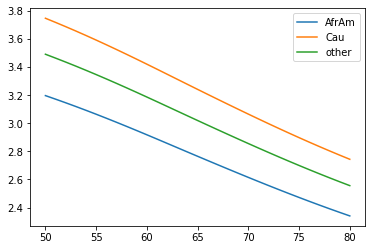

In [38]:
ages_fev1_df = pd.DataFrame(fev1s_AfrAm,ages)
ages_fev1_df['AfrAm'],ages_fev1_df['Cau'], ages_fev1_df['other'] = fev1s_AfrAm, fev1s_Cau, fev1s_other
ages_fev1_df = ages_fev1_df.drop(0, axis=1)
ages_fev1_df.plot()

In [27]:
from spiref import gli12 # https://github.com/kennethverstraete/spiref

# Load the calculator
rvc = gli12.GLIReferenceValueCalculator()

# Use the calculator to compute FEV1 for a male of height 174cm, age 28 of the African-American race.
fev1s = np.array([])
ages = np.array(range(50,81))

for age in range(50,81):
    fev1s = np.append(fev1s, 
                          rvc.calculate_fev1('male', 174, age, race='AfrAm'))
ages_fev1_df = pd.DataFrame(fev1s,ages)

In [35]:
fev1s_SEAsia,fev1s_Cau,fev1s_MexAm = np.array([]),np.array([]),np.array([])
ages = np.array(range(50,81))
for age in ages:
    fev1s_SEAsia = np.append(fev1s_SEAsia, 
                          rvc.calculate_fev1('male', 174, age, race='SEAsia'))
    fev1s_Cau = np.append(fev1s_Cau, 
                          rvc.calculate_fev1('male', 174, age, race='Cau'))
    fev1s_MexAm = np.append(fev1s_MexAm, 
                          rvc.calculate_fev1('male', 174, age, race='MexAm'))

<AxesSubplot:>

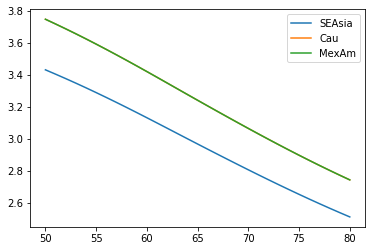

In [36]:
ages_fev1_df = pd.DataFrame(fev1s_SEAsia,ages)
ages_fev1_df['SEAsia'],ages_fev1_df['Cau'], ages_fev1_df['MexAm'] = fev1s_SEAsia, fev1s_Cau, fev1s_MexAm
ages_fev1_df = ages_fev1_df.drop(0, axis=1)
ages_fev1_df.plot()

## VO2max

Formulas for reference values were developed:

Males: VO2max/kg = − 0.0049 × age^2 + 0.0884 × age + 48.263 

Females: VO2max/kg = − 0.0021 × age^2 − 0.1407 × age + 43.066 

**For dutch cohort!:** https://www.ncbi.nlm.nih.gov/pmc/articles/PMC7966187/

<AxesSubplot:>

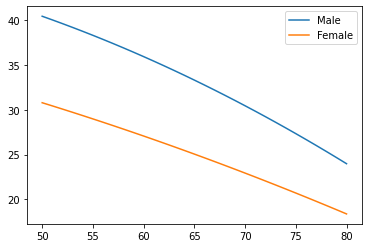

In [2]:
ages = np.array(range(50,81))
vo2max_males,vo2max_females = np.array([]),np.array([])
for age in ages:
    vo2max_male = (-0.0049 * age**2) + (0.0884 * age) + 48.263
    vo2max_female = (-0.0021 * age**2) - (0.1407 * age) + 43.066
    
    vo2max_males = np.append(vo2max_males,vo2max_male)
    vo2max_females = np.append(vo2max_females,vo2max_female)
vo2max_df = pd.DataFrame(index=ages)
vo2max_df['Male'] = vo2max_males
vo2max_df['Female'] = vo2max_females
vo2max_df.plot()

In [4]:
vo2max_df.loc[vo2max_df['Male'] == 40.4330]

,Male,Female
50,40.433,30.781


## NHANES Data

In [ ]:
BP_2020 = pd.read_sas('P_BPXO_2017_to_2020.xpt')
dexa_2020 = pd.read_sas('P_DXXFEM.xpt')
BP_2020.loc[BP_2020['SEQN'] == 109274.0]

In [13]:
dexa_2020.loc[dexa_2020['SEQN'] == 109274.0]

,SEQN,DXAFMRST,DXXFMBCC,DXXOFBMD,DXXOFBMC,DXXOFA,DXXNKBMD,DXXNKBMC,DXXNKA,DXXTRBMD,DXXTRBMC,DXXTRA,DXXINBMD,DXXINBMC,DXXINA,DXXWDBMD,DXXWDBMC,DXXWDA,DXAFMRK,DXAFMRD0
0,109274.0,1.0,5.397605e-79,1.032,49.59,48.03,0.831,5.21,6.27,0.794,13.18,16.61,1.24,31.2,25.15,0.557,0.65,1.17,1.1432,44.1491


In [6]:
dexa_2020.head()

,SEQN,DXAFMRST,DXXFMBCC,DXXOFBMD,DXXOFBMC,DXXOFA,DXXNKBMD,DXXNKBMC,DXXNKA,DXXTRBMD,DXXTRBMC,DXXTRA,DXXINBMD,DXXINBMC,DXXINA,DXXWDBMD,DXXWDBMC,DXXWDA,DXAFMRK,DXAFMRD0
0,109274.0,1.0,5.397605e-79,1.032,49.59,48.03,0.831,5.21,6.27,0.794,13.18,16.61,1.240,31.20,25.15,0.557,0.65,1.17,1.1432,44.1491
1,109282.0,1.0,5.397605e-79,0.807,29.98,37.16,0.661,3.56,5.38,0.646,8.65,13.39,0.967,17.78,18.39,0.435,0.45,1.04,1.1594,46.0592
2,109290.0,2.0,6.000000e+00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,109292.0,1.0,5.397605e-79,1.017,37.97,37.34,0.886,4.44,5.01,0.708,8.55,12.09,1.234,24.97,20.24,0.698,0.80,1.14,1.1286,50.6170
4,109295.0,5.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [9]:
dexa_2020.loc[dexa_2020['SEQN'] == 109264.0]

,SEQN,DXAFMRST,DXXFMBCC,DXXOFBMD,DXXOFBMC,DXXOFA,DXXNKBMD,DXXNKBMC,DXXNKA,DXXTRBMD,DXXTRBMC,DXXTRA,DXXINBMD,DXXINBMC,DXXINA,DXXWDBMD,DXXWDBMC,DXXWDA,DXAFMRK,DXAFMRD0


In [7]:
BP_2020.merge(dexa_2020, how='inner',on='SEQN')

,SEQN,BPAOARM,BPAOCSZ,BPXOSY1,BPXODI1,BPXOSY2,BPXODI2,BPXOSY3,BPXODI3,BPXOPLS1,...,DXXTRBMC,DXXTRA,DXXINBMD,DXXINBMC,DXXINA,DXXWDBMD,DXXWDBMC,DXXWDA,DXAFMRK,DXAFMRD0
0,109274.0,b'',3.0,138.0,70.0,132.0,69.0,132.0,71.0,NaN,...,13.18,16.61,1.240,31.20,25.15,0.557,0.65,1.17,1.1432,44.1491
1,109282.0,b'R',4.0,141.0,77.0,137.0,71.0,140.0,70.0,55.0,...,8.65,13.39,0.967,17.78,18.39,0.435,0.45,1.04,1.1594,46.0592
2,109290.0,b'R',3.0,126.0,62.0,116.0,60.0,122.0,59.0,59.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,109292.0,b'R',3.0,143.0,96.0,138.0,98.0,133.0,97.0,93.0,...,8.55,12.09,1.234,24.97,20.24,0.698,0.80,1.14,1.1286,50.6170
4,109295.0,b'R',3.0,158.0,96.0,161.0,92.0,158.0,92.0,93.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4588,124814.0,b'R',4.0,141.0,87.0,136.0,86.0,139.0,87.0,66.0,...,9.95,15.79,1.162,33.93,29.19,0.630,0.82,1.30,1.1207,50.1132
4589,124815.0,b'R',4.0,141.0,87.0,138.0,86.0,141.0,87.0,56.0,...,10.52,15.37,1.121,23.63,21.08,0.752,0.97,1.30,1.1329,44.2845
4590,124817.0,b'R',4.0,111.0,69.0,112.0,67.0,113.0,66.0,70.0,...,5.46,9.12,0.914,15.33,16.78,0.387,0.46,1.18,1.1499,44.5490
4591,124821.0,b'R',3.0,121.0,66.0,122.0,67.0,129.0,67.0,60.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
